In [1]:
!python --version
!which python

Python 3.7.10
/usr/local/bin/python


In [2]:
import os
import shutil
import zipfile
from glob import glob
from pprint import pprint
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from tqdm.notebook import tqdm

import util

In [3]:
# zip_files = glob('data/*.zip')
# for zip in zip_files:
#     with zipfile.ZipFile(zip) as z:
#         z.extractall('data/')

In [4]:
paths = glob('data/*')
for path in paths:
    if os.path.isfile(path):
        print(os.path.basename(path) + ' : ' + str(round(os.path.getsize(path) / (1024*1024), 2)) + ' MB')
    elif os.path.isdir(path):
        total = 0
        with os.scandir(path) as it:
            for e in it:
                total += e.stat().st_size
        print(os.path.basename(path) + ' : ' + str(round(total / (1024*1024), 2)) + ' MB')


In [5]:
test_images = sorted(glob('../data/test_images/*.png'))
train_annotations = sorted(glob('../data/train_annotations/*.json'))
train_images = sorted(glob('../data/train_images/*.png'))
print(len(test_images))
print(len(train_annotations))
print(len(train_images))

968
2258
2258


sample_img.shape:  (621, 579, 3)


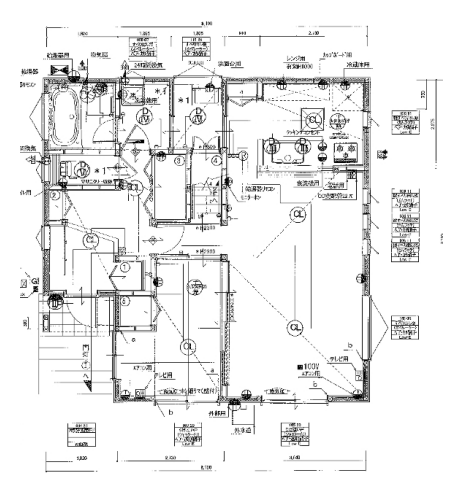

In [6]:
sample_img = cv2.imread(train_images[0])
print('sample_img.shape: ', sample_img.shape)
plt.figure(figsize=(5, 3), dpi=200)
plt.imshow(sample_img)
plt.axis('off')
plt.show()

In [7]:
sample_json_path = train_annotations[0]
sample_json_file = util.read_json(sample_json_path)

keys = list(sample_json_file['labels'].keys())

rect_keys = ['引戸', '折戸', '開戸']
polygon_keys = ['LDK', '廊下', '浴室']

In [8]:
for num in tqdm(range(len(train_images[:3]))):
    img = cv2.imread(train_images[num])
    json = util.read_json(train_annotations[num])
    for item in json['labels']:
        if item in rect_keys:
            for pts in json['labels'][item]:
                pts = np.array(pts, np.int)
                util.draw_rectangle(img, pts)
        elif item in polygon_keys:
            pts =  np.array(json['labels'][item], np.int32)
            util.draw_polylines(img, pts)
    cv2.imwrite('/content/drive/MyDrive/Colab_Notebooks/kaggle/panasonic/data/rect/' + os.path.basename(train_images[num]), img)